# LSTM Features

# SVC

In [1]:
# SVC for LSTM Features
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('C:/Users/hp/data - depression/features5.csv')
Feature_set=df
Feature_set=Feature_set.drop('condition', axis=1)
Feature_set=Feature_set.drop('control', axis=1)
Feature_set=Feature_set.drop('mean', axis=1)
Feature_set=Feature_set.drop('sd', axis=1)
Feature_set=Feature_set.drop('zeropercent', axis=1)
Feature_set=Feature_set.drop('label', axis=1)
Feature_set

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.982985,0.921513,-0.791289,-0.000939,-0.977411,0.802502,0.041691,0.971683,0.937752,0.152784,...,0.938676,0.724991,-0.006084,0.500394,0.954343,0.421814,-0.945902,0.306840,0.576341,0.969551
1,-0.349306,0.655156,-0.189268,-0.192599,-0.556844,0.320538,0.357701,0.703424,0.355301,-0.275950,...,0.876931,0.712769,-0.098774,-0.406293,0.120044,-0.418947,-0.312581,-0.009165,0.796593,0.234133
2,-0.982842,0.812639,-0.681467,0.002535,-0.959591,0.830469,-0.190434,0.958441,0.893731,0.248021,...,0.785999,0.659087,0.024738,0.466495,0.979441,0.557894,-0.929567,0.602360,0.513960,0.977779
3,-0.771260,0.705402,-0.722449,-0.052883,-0.702770,0.590350,0.244872,0.837140,0.935639,-0.382021,...,0.830810,0.651287,0.094092,-0.664137,0.544221,-0.578597,-0.785880,0.160015,0.785456,0.501821
4,-0.982559,0.717375,-0.807553,-0.023439,-0.901098,0.581883,0.214734,0.968036,0.990648,-0.435413,...,0.857558,0.550213,0.009182,-0.700093,0.750038,-0.768997,-0.958534,0.563224,0.795999,0.684306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,0.188955,-0.399384,0.226528,0.050597,0.495526,-0.606788,-0.536182,-0.157884,-0.046791,0.373095,...,-0.308237,-0.454576,-0.136351,0.301939,-0.169396,0.397831,-0.057425,-0.419061,-0.317852,-0.124091
1327,0.468668,-0.379304,0.393826,0.412158,0.476330,-0.212833,-0.480857,-0.289307,-0.357953,0.564802,...,-0.165224,-0.379795,-0.053348,0.252102,-0.669636,0.389883,0.577803,-0.695187,-0.067574,-0.456601
1328,0.255998,-0.506824,0.431088,-0.045667,0.597325,-0.560442,-0.718977,-0.366271,-0.103547,0.580565,...,-0.344540,-0.508769,-0.211668,0.618837,-0.347515,0.731086,0.062738,-0.681931,-0.560475,-0.185927
1329,0.469865,-0.533254,0.590977,0.388000,0.685858,-0.840519,-0.831092,-0.247702,-0.288448,0.851420,...,-0.334281,-0.619768,-0.048439,0.583243,-0.136111,0.588664,0.584000,-0.921230,-0.282780,-0.507243


In [3]:
X=np.asarray(Feature_set)
X

array([[-0.98298496,  0.9215132 , -0.7912887 , ...,  0.30684003,
         0.576341  ,  0.96955055],
       [-0.34930623,  0.6551563 , -0.18926765, ..., -0.00916496,
         0.7965932 ,  0.23413266],
       [-0.98284173,  0.81263864, -0.6814674 , ...,  0.6023602 ,
         0.51396024,  0.97777873],
       ...,
       [ 0.25599778, -0.50682425,  0.43108818, ..., -0.6819314 ,
        -0.5604747 , -0.18592721],
       [ 0.46986538, -0.533254  ,  0.5909768 , ..., -0.92122984,
        -0.28278023, -0.5072425 ],
       [-0.01839334, -0.36229384, -0.2268768 , ...,  0.08819633,
         0.01277518, -0.08254572]])

In [4]:
Y=np.asarray(df['label'])
Y

array(['condition', 'condition', 'condition', ..., 'control', 'control',
       'control'], dtype=object)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)
X_Train.shape, Y_Train.shape, X_Test.shape

((931, 25), (931,), (400, 25))

In [6]:
# Linear Classifier
# Fitting the classifier into the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)#, gamma='auto', C=2)  #
classifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,Y_Pred))
print(classification_report(Y_Test,Y_Pred))

[[169  12]
 [  9 210]]
              precision    recall  f1-score   support

   condition       0.95      0.93      0.94       181
     control       0.95      0.96      0.95       219

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



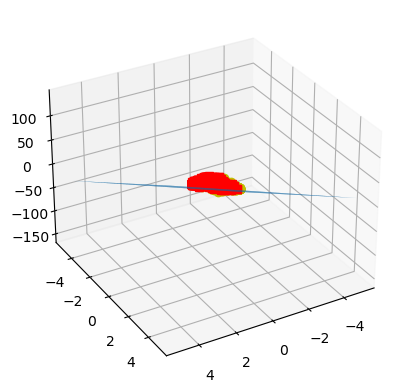

In [8]:
import plotly.graph_objs as go
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x-classifier.coef_[0][1]*y) / classifier.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y=='condition',0], X[Y=='condition',1], X[Y=='condition',2],'oy')
ax.plot3D(X[Y=='control',0], X[Y=='control',1], X[Y=='control',2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
clf = SVC(kernel='linear', C=0.1)
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)

print (scores),  (mean(scores))

[0.97014925 0.96992481 0.93233083 0.92481203 0.96240602 0.90977444
 0.96992481 0.97744361 0.9924812  0.93984962]


(None, 0.9549096622152394)

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
print (conf_mat)

[[531  28]
 [ 32 740]]


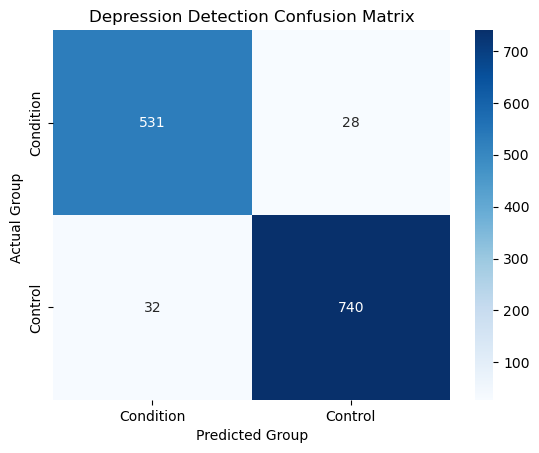

In [12]:
import seaborn as sns
ax=sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_title('Depression Detection Confusion Matrix');
ax.set_xlabel('Predicted Group')
ax.set_ylabel('Actual Group ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Condition','Control'])
ax.yaxis.set_ticklabels(['Condition','Control'])

## Display the visualization of the Confusion Matrix.
plt.savefig("depression confusion mat")
plt.show()

In [14]:
#normalization
cmn = conf_mat.astype('float')/conf_mat.sum(axis=1)[:, np.newaxis]

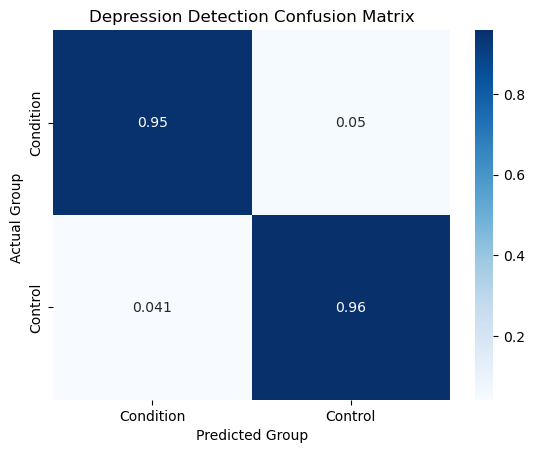

In [15]:
ax=sns.heatmap(cmn, annot=True, cmap='Blues', fmt='.2g')
ax.set_title('Depression Detection Confusion Matrix');
ax.set_xlabel('Predicted Group')
ax.set_ylabel('Actual Group ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Condition','Control'])
ax.yaxis.set_ticklabels(['Condition','Control'])

## Display the visualization of the Confusion Matrix.
plt.savefig("depression confusion mat")
plt.show()

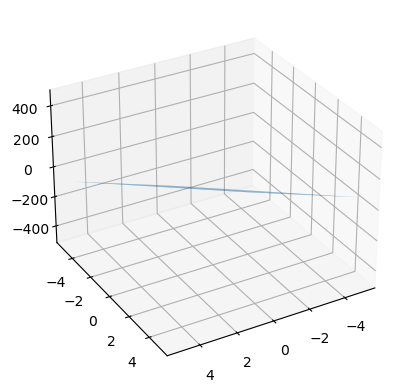

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Assuming you already have X and Y defined
# X: input features, Y: corresponding labels (0 or 1)

# Create a linear SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Define the separating plane function
w = clf.coef_[0]
b = clf.intercept_[0]
z = lambda x, y: (-b - w[0]*x - w[1]*y) / w[2]

# Create a meshgrid for 3D plot
tmp = np.linspace(-5, 5, 30)
x, y = np.meshgrid(tmp, tmp)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.plot3D(X[Y == 0, 0], X[Y == 0, 1], X[Y == 0, 2], 'ob')
ax.plot3D(X[Y == 1, 0], X[Y == 1, 1], X[Y == 1, 2], 'sr')

# Plot the separating plane
ax.plot_surface(x, y, z(x, y), alpha=0.5)

# Set view angle for better visualization
ax.view_init(30, 60)

# Show the plot
plt.show()


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,Y_Pred))
print(classification_report(Y_Test,Y_Pred))

[[169  12]
 [  9 210]]
              precision    recall  f1-score   support

   condition       0.95      0.93      0.94       181
     control       0.95      0.96      0.95       219

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [18]:
# Poly Kernel Classifier
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = svclassifier.predict(X_Test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,Y_Pred))
print(classification_report(Y_Test,Y_Pred))

[[142  39]
 [  4 215]]
              precision    recall  f1-score   support

   condition       0.97      0.78      0.87       181
     control       0.85      0.98      0.91       219

    accuracy                           0.89       400
   macro avg       0.91      0.88      0.89       400
weighted avg       0.90      0.89      0.89       400



In [20]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf', random_state=0, gamma=0.15, C=1)
svclassifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = svclassifier.predict(X_Test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,Y_Pred))
print(classification_report(Y_Test,Y_Pred))

[[170  11]
 [  9 210]]
              precision    recall  f1-score   support

   condition       0.95      0.94      0.94       181
     control       0.95      0.96      0.95       219

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
clf = SVC(kernel='rbf', random_state=0, gamma=0.003, C=9)
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
print (scores),  (mean(scores))

[0.96268657 0.96992481 0.93233083 0.92481203 0.96992481 0.90977444
 0.96992481 0.97744361 0.9924812  0.93984962]


(None, 0.9549152732577711)

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = svclassifier.predict(X_Test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,Y_Pred))
print(classification_report(Y_Test,Y_Pred))

[[167  14]
 [ 13 206]]
              precision    recall  f1-score   support

   condition       0.93      0.92      0.93       181
     control       0.94      0.94      0.94       219

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



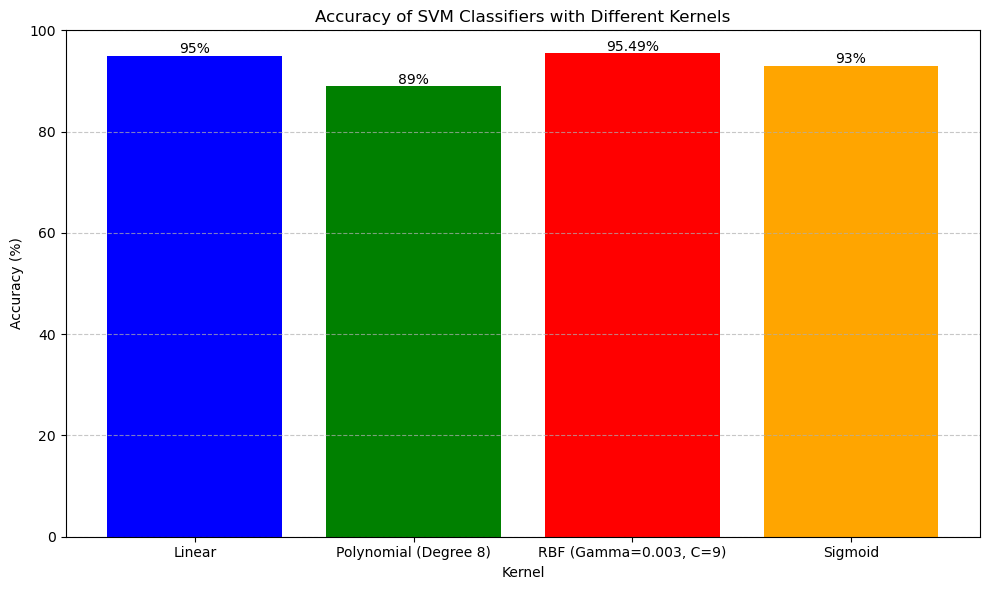

In [2]:
import matplotlib.pyplot as plt

# Accuracies of SVM classifiers with different kernels
accuracies = [95, 89, 95.49, 93]

# Kernel types
kernels = ['Linear', 'Polynomial (Degree 8)', 'RBF (Gamma=0.003, C=9)', 'Sigmoid']

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(kernels, accuracies, color=['blue', 'green', 'red', 'orange'])

# Add data labels
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{accuracy}%', ha='center')

# Add title and labels
plt.title('Accuracy of SVM Classifiers with Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy (%)')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
df = pd.read_csv('C:/Users/hp/data - depression/features5.csv')

# Separate features and labels
Feature_set = df.drop(['condition', 'control', 'mean', 'sd', 'zeropercent', 'label'], axis=1)
X = np.asarray(Feature_set)
Y = np.asarray(df['label'])

# Split the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

# List to store accuracy scores for each SVM kernel
accuracy_scores = []

# Linear Classifier
# Fitting the classifier into the Training set
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred_linear = classifier_linear.predict(X_Test)
# Calculating accuracy
accuracy_linear = classifier_linear.score(X_Test, Y_Test)
accuracy_scores.append(('linear', accuracy_linear))

# Poly Kernel Classifier
svclassifier_poly = SVC(kernel='poly', degree=8)
svclassifier_poly.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred_poly = svclassifier_poly.predict(X_Test)
# Calculating accuracy
accuracy_poly = svclassifier_poly.score(X_Test, Y_Test)
accuracy_scores.append(('poly', accuracy_poly))

# RBF Kernel Classifier
svclassifier_rbf = SVC(kernel='rbf', random_state=0, gamma=0.15, C=1)
svclassifier_rbf.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred_rbf = svclassifier_rbf.predict(X_Test)
# Calculating accuracy
accuracy_rbf = svclassifier_rbf.score(X_Test, Y_Test)
accuracy_scores.append(('rbf', accuracy_rbf))

# Sigmoid Kernel Classifier
svclassifier_sigmoid = SVC(kernel='sigmoid')
svclassifier_sigmoid.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred_sigmoid = svclassifier_sigmoid.predict(X_Test)
# Calculating accuracy
accuracy_sigmoid = svclassifier_sigmoid.score(X_Test, Y_Test)
accuracy_scores.append(('sigmoid', accuracy_sigmoid))

# Print accuracy scores for each SVM kernel
for kernel, accuracy in accuracy_scores:
    print(f'Test Accuracy ({kernel} kernel): {accuracy * 100:.2f}%')


Test Accuracy (linear kernel): 95.50%
Test Accuracy (poly kernel): 89.75%
Test Accuracy (rbf kernel): 95.50%
Test Accuracy (sigmoid kernel): 93.00%


In [29]:
from joblib import dump
from sklearn.metrics import accuracy_score
# Choose the best hyperparameters using cross-validation
best_svc = None
best_accuracy = 0.0
for C_value in [0.001, 0.01, 0.1, 1, 10, 100]:
    for gamma_value in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = SVC(kernel='rbf', C=C_value, gamma=gamma_value)
        scores = cross_val_score(clf, X_Train, Y_Train, scoring='accuracy', cv=5)
        mean_accuracy = np.mean(scores)
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_svc = clf

# Fit the best model on the entire training set
best_svc.fit(X_Train, Y_Train)

# Save the best model
dump(best_svc, 'best_svc_model.joblib')

# Predicting the test set results
Y_Pred = best_svc.predict(X_Test)

# Display the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test, Y_Pred))

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_Test, Y_Pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")


[[160  12]
 [  8 220]]
              precision    recall  f1-score   support

   condition       0.95      0.93      0.94       172
     control       0.95      0.96      0.96       228

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Accuracy on Test Set: 95.00%


# AdaBoost 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from joblib import dump
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
# Load your data
df = pd.read_csv('C:/Users/hp/data - depression/features5.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,mean,sd,zeropercent,condition,control,label
0,-0.982985,0.921513,-0.791289,-0.000939,-0.977411,0.802502,0.041691,0.971683,0.937752,0.152784,...,-0.945902,0.306840,0.576341,0.969551,131.482639,221.757161,41.180556,1,0,condition
1,-0.349306,0.655156,-0.189268,-0.192599,-0.556844,0.320538,0.357701,0.703424,0.355301,-0.275950,...,-0.312581,-0.009165,0.796593,0.234133,156.247222,229.030211,40.902778,1,0,condition
2,-0.982842,0.812639,-0.681467,0.002535,-0.959591,0.830469,-0.190434,0.958441,0.893731,0.248021,...,-0.929567,0.602360,0.513960,0.977779,153.253472,233.705525,42.222222,1,0,condition
3,-0.771260,0.705402,-0.722449,-0.052883,-0.702770,0.590350,0.244872,0.837140,0.935639,-0.382021,...,-0.785880,0.160015,0.785456,0.501821,124.135417,211.167917,46.180556,1,0,condition
4,-0.982559,0.717375,-0.807553,-0.023439,-0.901098,0.581883,0.214734,0.968036,0.990648,-0.435413,...,-0.958534,0.563224,0.795999,0.684306,124.177778,210.649740,44.097222,1,0,condition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,0.188955,-0.399384,0.226528,0.050597,0.495526,-0.606788,-0.536182,-0.157884,-0.046791,0.373095,...,-0.057425,-0.419061,-0.317852,-0.124091,231.229861,355.714571,32.222222,0,1,control
1327,0.468668,-0.379304,0.393826,0.412158,0.476330,-0.212833,-0.480857,-0.289307,-0.357953,0.564802,...,0.577803,-0.695187,-0.067574,-0.456601,113.031944,241.690209,54.722222,0,1,control
1328,0.255998,-0.506824,0.431088,-0.045667,0.597325,-0.560442,-0.718977,-0.366271,-0.103547,0.580565,...,0.062738,-0.681931,-0.560475,-0.185927,180.938889,315.057714,40.486111,0,1,control
1329,0.469865,-0.533254,0.590977,0.388000,0.685858,-0.840519,-0.831092,-0.247702,-0.288448,0.851420,...,0.584000,-0.921230,-0.282780,-0.507243,210.545139,314.766782,30.833333,0,1,control


In [32]:
# Separate features and labels
Feature_set = df.drop(['condition', 'control', 'mean', 'sd', 'zeropercent', 'label'], axis=1)
X = np.asarray(Feature_set)
Y = np.asarray(df['label'])

In [33]:
# Split the dataset into the Training set and Test set (70:30 split)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [37]:
import pandas as pd

# Assuming X_Test is a NumPy array or a pandas Series
# If it's a NumPy array, convert it to a pandas Series
X_Test_data = pd.DataFrame(X_Test)

# Save the DataFrame to a CSV file
X_Test_data.to_csv('true_labels_lstm.csv', index=False)
X_Test_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.052248,0.385528,0.557069,-0.081156,-0.318437,-0.031498,-0.308434,0.118068,-0.128027,0.392197,...,-0.071455,0.131955,-0.417919,0.342351,-0.224303,0.257159,0.014182,-0.292147,-0.125311,-0.250258
1,0.552094,-0.544007,0.675997,-0.091659,0.776743,-0.722145,-0.867063,-0.513623,-0.269407,0.885162,...,-0.494222,-0.689789,-0.044578,0.787072,-0.546135,0.858478,0.361355,-0.879340,-0.466378,-0.343792
2,0.592876,-0.589880,0.690001,0.096859,0.817229,-0.554367,-0.916521,-0.614048,-0.399635,0.913035,...,-0.651087,-0.576182,-0.073940,0.765583,-0.666570,0.767648,0.160801,-0.841384,-0.646126,-0.335119
3,-0.979690,0.804937,-0.779263,-0.006036,-0.940644,0.693262,0.152741,0.965127,0.987458,-0.224078,...,0.892764,0.584982,0.010904,-0.589669,0.775597,-0.701194,-0.948838,0.506051,0.802007,0.821165
4,0.605131,-0.520951,0.674382,0.163304,0.711075,-0.731833,-0.845530,-0.440901,-0.479886,0.885126,...,-0.466027,-0.633213,-0.051840,0.730332,-0.662199,0.728580,0.586313,-0.820939,-0.267168,-0.444826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.754388,-0.574685,0.698072,0.268615,0.832310,-0.557038,-0.913342,-0.725372,-0.532585,0.941242,...,-0.679723,-0.520511,-0.027738,0.681907,-0.761013,0.844215,0.431859,-0.887143,-0.534264,-0.360984
396,-0.710759,0.340857,-0.390895,-0.088539,-0.639853,0.437113,0.405886,0.789478,0.856143,-0.792869,...,0.867682,0.500520,0.077944,-0.981679,0.595706,-0.934109,-0.613549,0.142671,0.940373,0.457538
397,-0.932231,0.909672,0.517134,-0.011193,-0.908353,0.801419,-0.091859,0.913969,0.375655,0.105389,...,0.925455,0.803922,-0.860686,0.189937,-0.820234,0.120745,-0.900166,-0.130562,0.028918,-0.750963
398,-0.043021,0.479690,0.009955,-0.316867,-0.569666,0.262214,0.293787,0.654124,0.030439,-0.240706,...,0.773209,0.595820,-0.131189,-0.235297,0.004620,-0.233007,-0.286292,-0.058296,0.709538,0.046562


In [38]:
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif)),  # Step 2: Feature Selection
    ('dimension_reduction', PCA()),  # Step 3: Dimension Reduction
    ('adaboost', AdaBoostClassifier())  # Step 4: AdaBoost Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Train the classifier
pipeline.fit(X_Train, Y_Train)

# Save the trained model to a file
dump(pipeline, 'adaboost_model.joblib')

['adaboost_model.joblib']

In [39]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('dimension_reduction', PCA()),
                ('adaboost', AdaBoostClassifier())])

In [40]:
# Access the AdaBoostClassifier in the pipeline
adaboost_classifier = pipeline.named_steps['adaboost']

# Access individual base classifiers (trees) in the AdaBoost ensemble
for i, tree in enumerate(adaboost_classifier.estimators_):
    print(f"Tree {i + 1} - {tree}")


Tree 1 - DecisionTreeClassifier(max_depth=1, random_state=1346758493)
Tree 2 - DecisionTreeClassifier(max_depth=1, random_state=649231428)
Tree 3 - DecisionTreeClassifier(max_depth=1, random_state=297363373)
Tree 4 - DecisionTreeClassifier(max_depth=1, random_state=590374624)
Tree 5 - DecisionTreeClassifier(max_depth=1, random_state=838714663)
Tree 6 - DecisionTreeClassifier(max_depth=1, random_state=1114659099)
Tree 7 - DecisionTreeClassifier(max_depth=1, random_state=485979018)
Tree 8 - DecisionTreeClassifier(max_depth=1, random_state=1286648982)
Tree 9 - DecisionTreeClassifier(max_depth=1, random_state=802593675)
Tree 10 - DecisionTreeClassifier(max_depth=1, random_state=1061398673)
Tree 11 - DecisionTreeClassifier(max_depth=1, random_state=1922104763)
Tree 12 - DecisionTreeClassifier(max_depth=1, random_state=1550383762)
Tree 13 - DecisionTreeClassifier(max_depth=1, random_state=102934965)
Tree 14 - DecisionTreeClassifier(max_depth=1, random_state=930070743)
Tree 15 - DecisionTreeC

In [41]:
# Predicting the test set results
Y_Pred = pipeline.predict(X_Test)
Y_Pred

array(['control', 'control', 'control', 'condition', 'control',
       'condition', 'control', 'control', 'condition', 'control',
       'condition', 'control', 'condition', 'control', 'control',
       'condition', 'condition', 'condition', 'condition', 'condition',
       'control', 'condition', 'control', 'control', 'control',
       'condition', 'control', 'condition', 'control', 'condition',
       'condition', 'control', 'control', 'control', 'condition',
       'control', 'condition', 'condition', 'condition', 'control',
       'condition', 'control', 'control', 'control', 'condition',
       'condition', 'condition', 'control', 'condition', 'condition',
       'condition', 'condition', 'condition', 'control', 'control',
       'condition', 'control', 'control', 'control', 'condition',
       'control', 'condition', 'control', 'control', 'condition',
       'condition', 'condition', 'condition', 'condition', 'control',
       'condition', 'condition', 'control', 'control', 'cont

In [42]:
# Display classification report and confusion matrix
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test, Y_Pred))

[[158  14]
 [ 10 218]]
              precision    recall  f1-score   support

   condition       0.94      0.92      0.93       172
     control       0.94      0.96      0.95       228

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [43]:
# Cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=10)
print(f"Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")


Cross-Validation Accuracy: 93.31%


In [44]:
# Evaluate the model on unseen data
accuracy = accuracy_score(Y_Test, Y_Pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 94.00%


In [45]:
# Create a confusion matrix
conf_mat = confusion_matrix(Y_Test, Y_Pred)
print(conf_mat)

[[158  14]
 [ 10 218]]


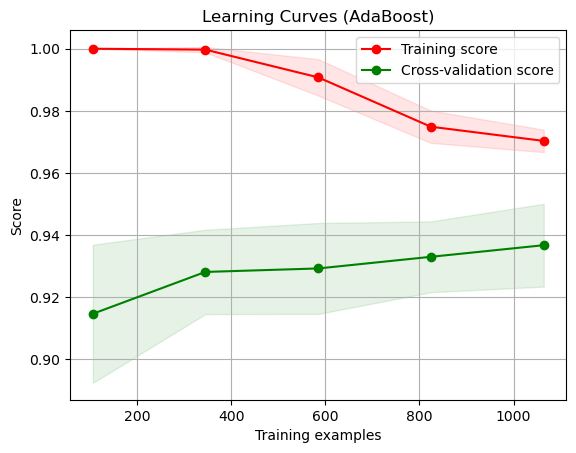

In [46]:
# Plot accuracy curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (AdaBoost)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve(pipeline, title, X, Y, cv=cv, n_jobs=-1)
plt.show()


# RandomForest

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from joblib import dump
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
# Load your data
df = pd.read_csv('C:/Users/hp/data - depression/features5.csv')

In [49]:
# Separate features and labels
Feature_set = df.drop(['condition', 'control', 'mean', 'sd', 'zeropercent', 'label'], axis=1)
X = np.asarray(Feature_set)
Y = np.asarray(df['label'])

In [50]:
# Split the dataset into the Training set and Test set (70:30 split)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [51]:
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif)),  # Step 2: Feature Selection
    ('dimension_reduction', PCA()),  # Step 3: Dimension Reduction
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=0))  # Step 4: Random Forest Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Train the classifier
pipeline.fit(X_Train, Y_Train)

# Save the trained model to a file
dump(pipeline, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [52]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('dimension_reduction', PCA()),
                ('random_forest', RandomForestClassifier(random_state=0))])

In [53]:
# Predicting the test set results
Y_Pred = pipeline.predict(X_Test)
Y_Pred

array(['control', 'control', 'control', 'condition', 'control',
       'condition', 'control', 'control', 'condition', 'condition',
       'condition', 'control', 'condition', 'control', 'control',
       'condition', 'condition', 'condition', 'condition', 'condition',
       'control', 'control', 'control', 'control', 'control', 'condition',
       'control', 'condition', 'control', 'condition', 'condition',
       'control', 'control', 'control', 'condition', 'control',
       'condition', 'condition', 'condition', 'control', 'condition',
       'control', 'control', 'control', 'condition', 'condition',
       'condition', 'control', 'condition', 'condition', 'condition',
       'condition', 'condition', 'control', 'control', 'condition',
       'control', 'control', 'control', 'condition', 'control',
       'condition', 'condition', 'control', 'condition', 'condition',
       'condition', 'condition', 'condition', 'control', 'condition',
       'condition', 'control', 'control', 'co

In [54]:
# Display classification report and confusion matrix
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test, Y_Pred))

[[160  12]
 [ 11 217]]
              precision    recall  f1-score   support

   condition       0.94      0.93      0.93       172
     control       0.95      0.95      0.95       228

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [55]:
# Cross-validation
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=10)
print(f"Cross-Validation Accuracy: {np.mean(scores) * 100:.2f}%")

Cross-Validation Accuracy: 94.97%


In [56]:
# Evaluate the model on unseen data
accuracy = accuracy_score(Y_Test, Y_Pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 94.25%


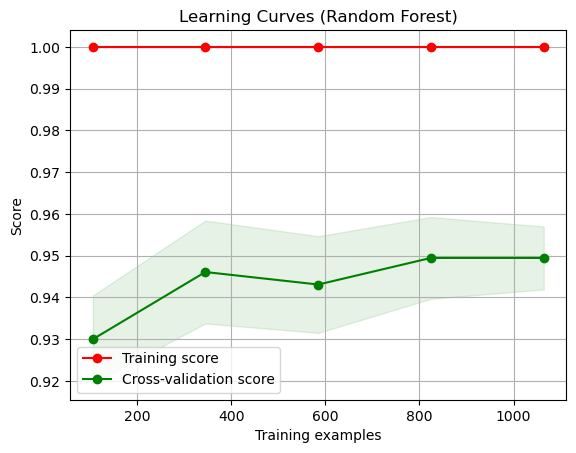

In [57]:
# Plot accuracy curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
plot_learning_curve(pipeline, title, X, Y, cv=cv, n_jobs=-1)
plt.show()


In [58]:
importances = pipeline.named_steps['random_forest'].feature_importances_

for i, importance in enumerate(importances):
    print(f"Tree {i + 1} - Feature Importance: {importance}")


Tree 1 - Feature Importance: 0.6149340176738097
Tree 2 - Feature Importance: 0.034739427034753245
Tree 3 - Feature Importance: 0.06883059827921836
Tree 4 - Feature Importance: 0.08502815936364246
Tree 5 - Feature Importance: 0.030078406254543062
Tree 6 - Feature Importance: 0.03822951972720712
Tree 7 - Feature Importance: 0.047116580472279096
Tree 8 - Feature Importance: 0.023734095308430236
Tree 9 - Feature Importance: 0.03648601963448824
Tree 10 - Feature Importance: 0.020823176251628606


# Time Domain Features

# SVC

In [74]:
import numpy as np
import pandas as pd

In [75]:
# Load your data
df = pd.read_csv('all_features.csv')

In [76]:
df.isnull().sum()

date                    0
n                       0
mean_act                0
std_act                 0
skewness_act            0
kurtosis_act            0
median_act              0
variance_act            0
rms_act                 0
shape_factor_act       70
crest_factor_act       70
impulse_factor_act      0
peak_activity           0
autocorrelation_act    78
entropy_act             0
zero_crossing_rate      0
mean_absolute_value     0
Label                   0
dtype: int64

In [77]:
df.shape

(1029, 18)

In [78]:
df.dropna()

,date,n,mean_act,std_act,skewness_act,kurtosis_act,median_act,variance_act,rms_act,shape_factor_act,crest_factor_act,impulse_factor_act,peak_activity,autocorrelation_act,entropy_act,zero_crossing_rate,mean_absolute_value,Label
0,2003-05-08,1440,156.247222,229.109777,2.017975,5.816912,27.0,52491.289777,277.250847,3.148627,7.047769,1954,1954,0.697114,-1.942628e+06,220,156.247222,condition
1,2003-05-09,1440,124.135417,211.241278,2.485646,7.581422,14.0,44622.877411,244.952018,3.893773,6.825827,1672,1672,0.661777,-1.524264e+06,220,124.135417,condition
2,2003-05-10,1440,134.961806,230.954732,3.002992,12.496527,33.0,53340.088186,267.428000,3.926377,8.024590,2146,2146,0.671603,-1.663836e+06,223,134.961806,condition
3,2003-05-11,1440,99.439583,177.719972,3.279512,18.290822,15.0,31584.388286,203.594414,4.191921,10.216390,2080,2080,0.564451,-1.178811e+06,240,99.439583,condition
4,2003-05-12,1440,316.874306,496.184847,2.041789,4.700157,40.5,246199.402536,588.589633,3.450255,5.990591,3526,3526,0.799103,-4.455023e+06,185,316.874306,condition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2003-04-04,1440,38.409028,204.927591,6.165573,38.901694,0.0,41995.317639,208.426024,29.446743,8.338690,1738,1738,0.908669,-5.481235e+05,32,38.409028,control
1013,2003-04-07,1440,0.024306,0.922331,37.947332,1440.000000,0.0,0.850694,0.922331,1440.000000,37.947332,35,35,-0.000695,-1.795249e+02,2,0.024306,control
1014,2003-04-08,1440,0.035417,1.292302,37.855137,1435.207429,0.0,1.670044,1.292339,1331.487889,37.915762,49,49,-0.000752,-2.771208e+02,4,0.035417,control
1016,2003-04-10,1440,3.309028,45.574516,14.808738,228.042584,0.0,2077.036472,45.678701,190.557773,19.111752,873,873,0.820246,-4.389501e+04,2,3.309028,control


In [79]:
# Assuming df is your DataFrame
# Replace NaN values in specific columns with the mean of each column
df['shape_factor_act'].fillna(df['shape_factor_act'].mean(), inplace=True)
df['crest_factor_act'].fillna(df['crest_factor_act'].mean(), inplace=True)
df['autocorrelation_act'].fillna(df['autocorrelation_act'].mean(), inplace=True)


In [80]:
df.isnull().sum()

date                   0
n                      0
mean_act               0
std_act                0
skewness_act           0
kurtosis_act           0
median_act             0
variance_act           0
rms_act                0
shape_factor_act       0
crest_factor_act       0
impulse_factor_act     0
peak_activity          0
autocorrelation_act    0
entropy_act            0
zero_crossing_rate     0
mean_absolute_value    0
Label                  0
dtype: int64

In [81]:
df.shape

(1029, 18)

Cross-Validation Accuracy: 76.53%
Accuracy on Test Set: 77.35%

Confusion Matrix:
[[ 56  52]
 [ 18 183]]

Classification Report:
              precision    recall  f1-score   support

   condition       0.76      0.52      0.62       108
     control       0.78      0.91      0.84       201

    accuracy                           0.77       309
   macro avg       0.77      0.71      0.73       309
weighted avg       0.77      0.77      0.76       309


Model Architecture:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('svc', SVC(C=0.1, kernel='linear'))])


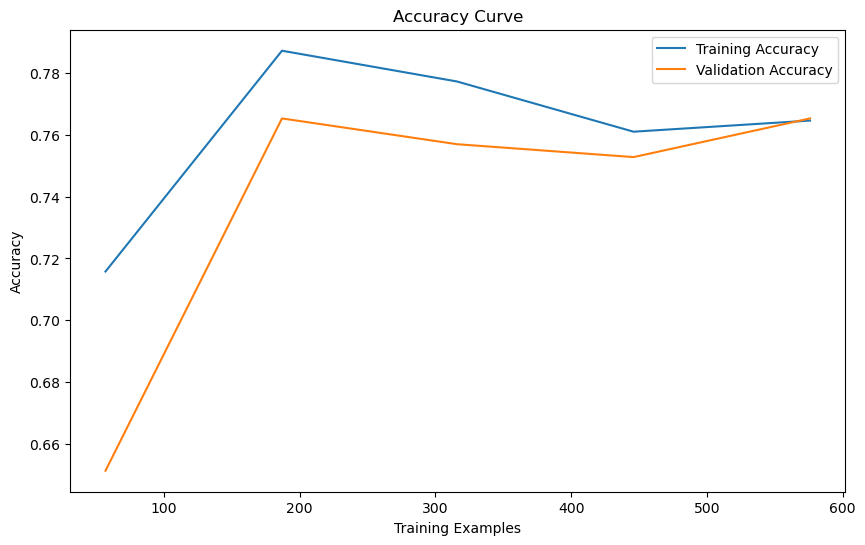

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

# Separate features and labels
X = df.drop(['date', 'n', 'Label','mean_act','std_act','skewness_act','kurtosis_act','median_act'], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif)),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Save the best model to a file
dump(pipeline, 'best_svc_model.joblib')

# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
print("\nModel Architecture:")
print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)


# Adaboost

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

In [84]:
# Separate features and labels
X = df.drop(['date', 'n', 'Label','mean_act','std_act','skewness_act','kurtosis_act','median_act'], axis=1)
# Replace 'target_column' with the actual target column name
y = df['Label']

In [85]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [86]:
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif)),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())  # Step 3: AdaBoost Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

In [87]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('adaboost', AdaBoostClassifier())])

In [88]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('adaboost', AdaBoostClassifier())]),
             param_grid={'adaboost__learning_rate': [0.01, 0.1, 1.0],
                         'adaboost__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [89]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('adaboost', AdaBoostClassifier(learning_rate=0.01))])

In [90]:
# Save the best model to a file
dump(pipeline, 'best_adaboost_model.joblib')

['best_adaboost_model.joblib']

In [91]:
# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

Cross-Validation Accuracy: 75.14%


In [92]:
# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

Accuracy on Test Set: 76.70%


In [96]:
import pandas as pd

# Assuming y_test is a pandas Series
X_test.to_csv('test_tdf.csv')
X_test

,variance_act,rms_act,shape_factor_act,crest_factor_act,impulse_factor_act,peak_activity,autocorrelation_act,entropy_act,zero_crossing_rate,mean_absolute_value
187,84906.621494,342.786608,3.598305,5.957059,2042,2042,0.662167,-2.330694e+06,243,180.706944
71,53186.296964,269.432232,3.733407,8.143049,2194,2194,0.726851,-1.721218e+06,252,139.443056
308,0.000000,0.000000,47.633511,8.471421,0,0,0.687011,-0.000000e+00,0,0.000000
851,55563.471298,264.740772,4.812792,4.808477,1273,1273,0.775308,-1.537670e+06,103,120.676389
660,45879.299187,257.193591,3.258372,5.105104,1313,1313,0.743148,-1.748508e+06,189,142.481944
...,...,...,...,...,...,...,...,...,...,...
48,181782.561844,477.631238,4.908666,5.550307,2651,2651,0.872541,-2.991438e+06,0,215.581250
712,154730.117203,427.539192,6.489479,11.542801,4935,4935,0.754233,-2.327509e+06,110,167.830556
971,272304.975762,752.656262,1.924383,3.620511,2725,2725,0.776620,-7.686100e+06,80,542.563889
637,80919.489228,326.779006,4.119579,5.447106,1780,1780,0.686759,-2.075184e+06,219,161.000694


In [97]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 54  54]
 [ 18 183]]


In [98]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   condition       0.75      0.50      0.60       108
     control       0.77      0.91      0.84       201

    accuracy                           0.77       309
   macro avg       0.76      0.71      0.72       309
weighted avg       0.76      0.77      0.75       309



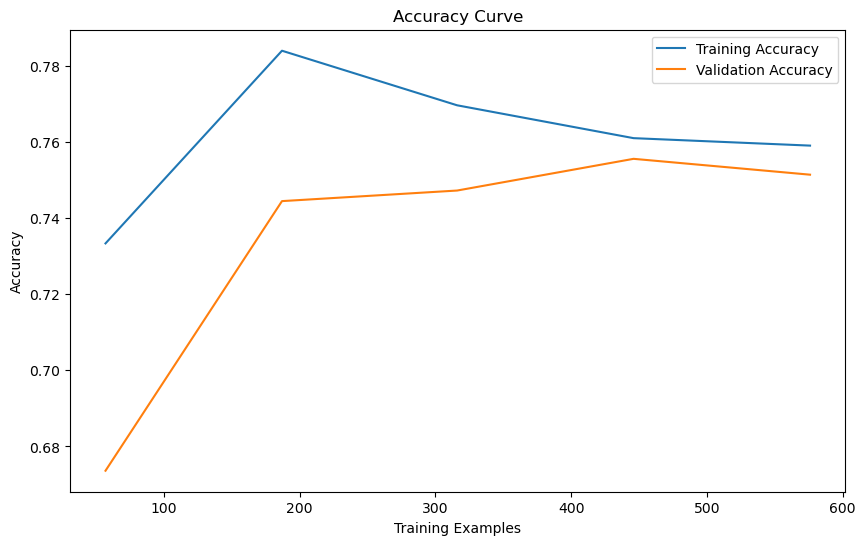

In [100]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
#print("\nModel Architecture:")
#print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)

# Random Forest

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

Cross-Validation Accuracy: 76.39%
Accuracy on Test Set: 76.70%

Confusion Matrix:
[[ 51  57]
 [ 15 186]]

Classification Report:
              precision    recall  f1-score   support

   condition       0.77      0.47      0.59       108
     control       0.77      0.93      0.84       201

    accuracy                           0.77       309
   macro avg       0.77      0.70      0.71       309
weighted avg       0.77      0.77      0.75       309


Model Architecture:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest()),
                ('random_forest', RandomForestClassifier(min_samples_leaf=4))])


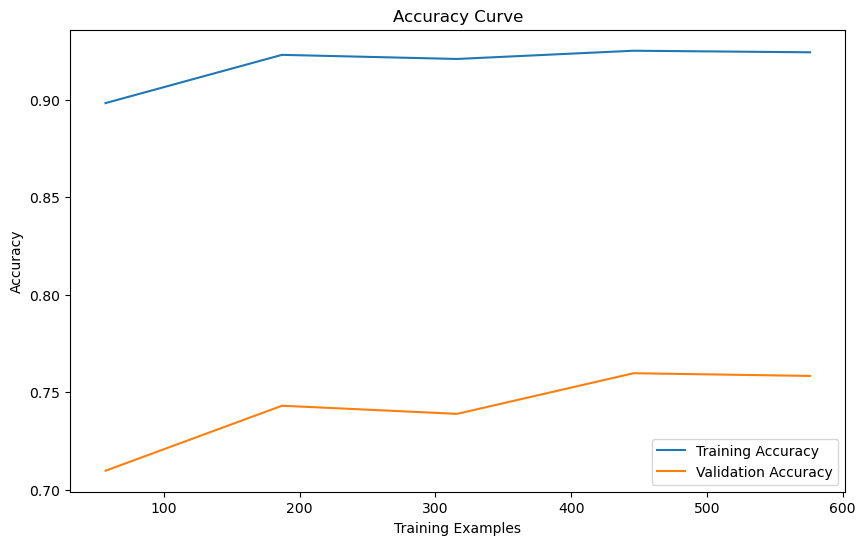

In [102]:
# Separate features and labels
X = df.drop(['date', 'n', 'Label','mean_act','std_act','skewness_act','kurtosis_act','median_act'], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif)),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Save the best model to a file
dump(pipeline, 'best_random_forest_model.joblib')

# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
print("\nModel Architecture:")
print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)

# Statistical Features

In [103]:
import numpy as np
import pandas as pd


In [104]:
# Load your data
df = pd.read_csv('all_features.csv')

In [105]:
df.isnull().sum()

date                    0
n                       0
mean_act                0
std_act                 0
skewness_act            0
kurtosis_act            0
median_act              0
variance_act            0
rms_act                 0
shape_factor_act       70
crest_factor_act       70
impulse_factor_act      0
peak_activity           0
autocorrelation_act    78
entropy_act             0
zero_crossing_rate      0
mean_absolute_value     0
Label                   0
dtype: int64

In [106]:
# Assuming df is your DataFrame
# Replace NaN values in specific columns with the mean of each column
df['shape_factor_act'].fillna(df['shape_factor_act'].mean(), inplace=True)
df['crest_factor_act'].fillna(df['crest_factor_act'].mean(), inplace=True)
df['autocorrelation_act'].fillna(df['autocorrelation_act'].mean(), inplace=True)


# AdaBoost

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

In [107]:
# Separate features and labels
X = df.drop(['date', 'n', 'Label','rms_act','shape_factor_act','crest_factor_act','impulse_factor_act',	'peak_activity',	'autocorrelation_act',
             'entropy_act',	'zero_crossing_rate',	'mean_absolute_value'	], axis=1)
# Replace 'target_column' with the actual target column name
y = df['Label']

In [108]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [109]:
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),                    # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif, k='all')),  # Step 2: Feature Selection
    ('adaboost', AdaBoostClassifier())               # Step 3: AdaBoost Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

In [110]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(k='all')),
                                       ('adaboost', AdaBoostClassifier())]),
             param_grid={'adaboost__learning_rate': [0.01, 0.1, 1.0],
                         'adaboost__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [111]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('adaboost', AdaBoostClassifier(learning_rate=0.1))])

In [112]:
# Save the best model to a file
dump(pipeline, 'best_adaboost_model.joblib')

['best_adaboost_model.joblib']

In [113]:
# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

Cross-Validation Accuracy: 71.94%


In [114]:
# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

Accuracy on Test Set: 76.70%


In [115]:
# Save y_test and y_test_pred to a CSV file
df_results = pd.DataFrame(X_test)
df_results.to_csv('test_results.csv', index=False)

In [116]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 62  46]
 [ 26 175]]


In [117]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   condition       0.70      0.57      0.63       108
     control       0.79      0.87      0.83       201

    accuracy                           0.77       309
   macro avg       0.75      0.72      0.73       309
weighted avg       0.76      0.77      0.76       309




Model Architecture:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('adaboost', AdaBoostClassifier(learning_rate=0.1))])


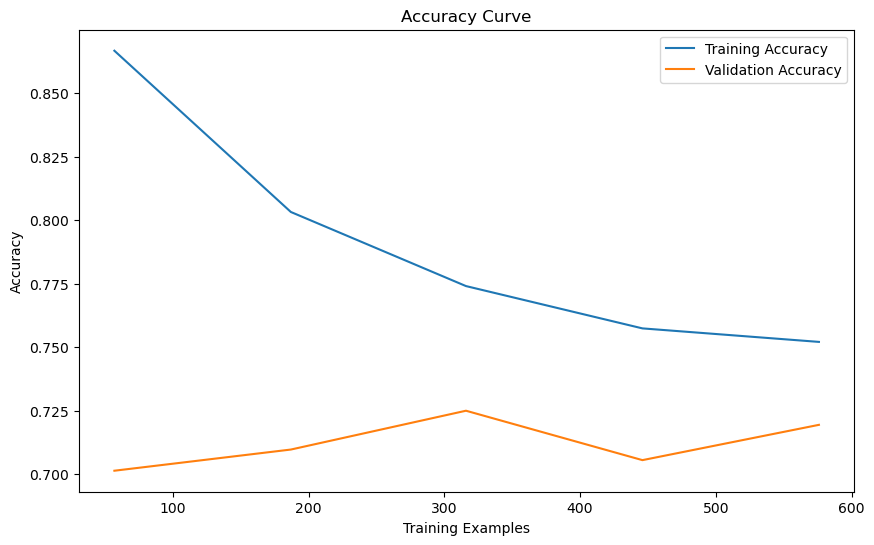

In [118]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
print("\nModel Architecture:")
print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)

# Random Forest

Cross-Validation Accuracy: 71.43%
Accuracy on Test Set: 72.73%

Confusion Matrix:
[[ 61  45]
 [ 33 147]]

Classification Report:
              precision    recall  f1-score   support

   condition       0.65      0.58      0.61       106
     control       0.77      0.82      0.79       180

    accuracy                           0.73       286
   macro avg       0.71      0.70      0.70       286
weighted avg       0.72      0.73      0.72       286


Model Architecture:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('random_forest',
                 RandomForestClassifier(bootstrap=False, max_depth=10,
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=50))])


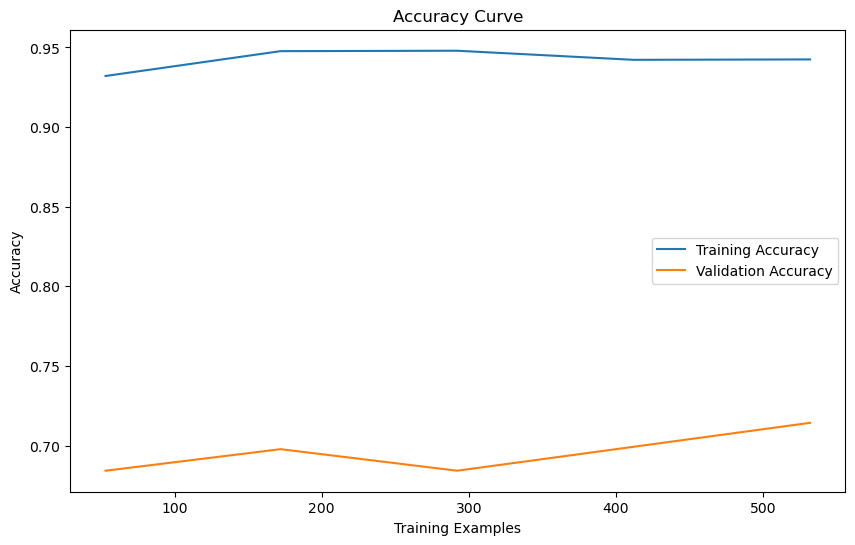

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(['date', 'n', 'Label','rms_act','shape_factor_act','crest_factor_act','impulse_factor_act',	'peak_activity',	'autocorrelation_act',
             'entropy_act',	'zero_crossing_rate',	'mean_absolute_value'	], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif,k='all')),  # Step 2: Feature Selection
    ('random_forest', RandomForestClassifier())  # Step 3: Random Forest Classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__bootstrap': [True, False]
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Save the best model to a file
dump(pipeline, 'best_random_forest_model.joblib')

# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
print("\nModel Architecture:")
print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)


# SVC

Cross-Validation Accuracy: 73.83%
Accuracy on Test Set: 72.03%

Confusion Matrix:
[[ 55  51]
 [ 29 151]]

Classification Report:
              precision    recall  f1-score   support

   condition       0.65      0.52      0.58       106
     control       0.75      0.84      0.79       180

    accuracy                           0.72       286
   macro avg       0.70      0.68      0.68       286
weighted avg       0.71      0.72      0.71       286


Model Architecture:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k='all')),
                ('svc', SVC(C=1))])


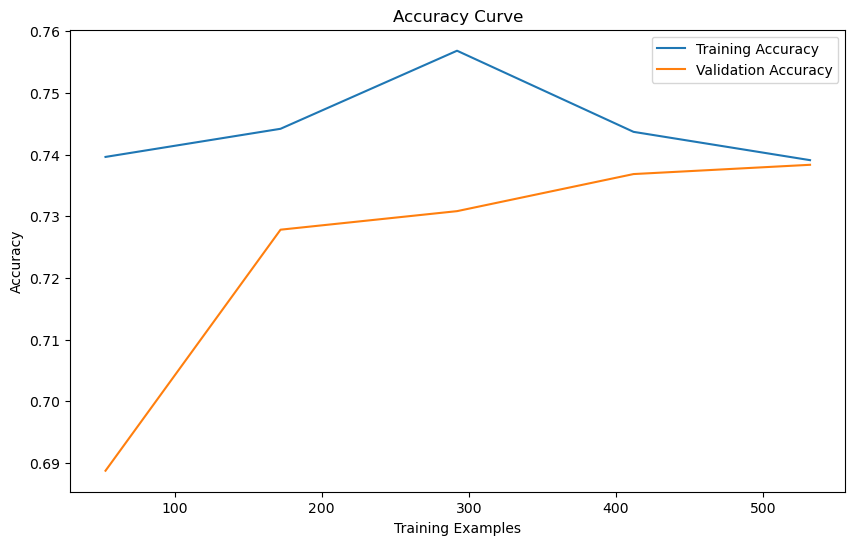

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump, load

# Load your data
df = pd.read_csv('all_features.csv')

# Handle missing values
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(['date', 'n', 'Label','rms_act','shape_factor_act','crest_factor_act','impulse_factor_act',	'peak_activity',	'autocorrelation_act',
             'entropy_act',	'zero_crossing_rate','mean_absolute_value'], axis=1)
y = df['Label']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('feature_selection', SelectKBest(f_classif,k='all')),  # Step 2: Feature Selection
    ('svc', SVC())  # Step 3: Support Vector Classifier (SVC)
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the full training set
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Save the best model to a file
dump(pipeline, 'best_svc_model.joblib')

# Cross-validation on the training set
cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy) * 100:.2f}%")

# Evaluate the model on the test set
y_test_pred = pipeline.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report)

# Plot accuracy curve
def plot_accuracy_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')

    plt.title('Accuracy Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Print out the model architecture
print("\nModel Architecture:")
print(pipeline)

# Plot accuracy curve
plot_accuracy_curve(pipeline, X_train, y_train, cv=5)


In [14]:
import pandas as pd

# Data
data = {
    'Model': ['Adaboost', 'Random Forest', 'SVC'],
    'Statistical Features': [73.43, 74.13, 72.03],
    'Time Domain Features': [75.17, 76.57, 79.72],
    'LSTM Extracted Features': [94.0, 94.25, 95.5]
}

# Create DataFrame
df = pd.DataFrame(data)

# Rank Aggregation Late Fusion: Weighted average based on model rankings for each feature set
ranks = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].rank(axis=0)
weights_rank_aggregation = 1 / ranks
df['Rank Aggregation Late Fusion'] = (weights_rank_aggregation * df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']]).sum(axis=1)

# Weighted Late Fusion: Weighted average across models for each feature set
weights_weighted = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].apply(lambda x: x / x.sum(), axis=1)
df['Weighted Late Fusion'] = (weights_weighted * df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']]).sum(axis=1)

# Late Fusion: Average across models for each feature set
df['Average Late Fusion'] = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].mean(axis=1)

# Geometric Mean Fusion: Geometric mean across models for each feature set
df['Geometric Mean Fusion'] = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].apply(lambda x: x.prod()**(1/len(x)), axis=1)

# Min Fusion: Minimum score across models for each feature set
df['Min Fusion'] = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].min(axis=1)

# Max Fusion: Maximum score across models for each feature set
df['Max Fusion'] = df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].max(axis=1)

# Harmonic Mean Fusion: Harmonic mean across models for each feature set
df['Harmonic Mean Fusion'] = len(df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']]) / df[['Statistical Features', 'Time Domain Features', 'LSTM Extracted Features']].apply(lambda x: 1 / x, axis=1).sum(axis=1)


# Save to CSV
df.to_csv('model_accuracy_with_fusion.csv', index=False)
df


,Model,Statistical Features,Time Domain Features,LSTM Extracted Features,Rank Aggregation Late Fusion,Weighted Late Fusion,Average Late Fusion,Geometric Mean Fusion,Min Fusion,Max Fusion,Harmonic Mean Fusion
0,Adaboost,73.43,75.17,94.00,205.885000,81.939381,80.866667,80.355445,73.43,94.00,79.872440
1,Random Forest,74.13,76.57,94.25,110.120000,82.634351,81.650000,81.179182,74.13,94.25,80.732318
2,SVC,72.03,79.72,95.50,130.436667,83.574719,82.416667,81.851761,72.03,95.50,81.304752


In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import load

#stats
m1 = load('C:/Users/hp/models/best_adaboost_stat_model.joblib')
m2 =load('C:/Users/hp/models/best_random_forest_stat_model.joblib')
m3 = load('C:/Users/hp/models/best_svc_stat_model.joblib')

#tdf
m4 = load('C:/Users/hp/models/best_adaboost_tdf_model.joblib')
m5 = load('C:/Users/hp/models/best_random_forest_tdf_model.joblib')
m6 = load('C:/Users/hp/models/best_svc_tdf_model.joblib')

#lstm
m7 = load('C:/Users/hp/models/adaboost_lstm_model.joblib')
m8 = load('C:/Users/hp/models/random_forest_lstm_model.joblib')
m9 = load('C:/Users/hp/models/best_svc_lstm_model.joblib')

# Soft Voting (Averaging)
combined_probabilities = (m1 + m2 + m3 + m4 + m5 + m6 + m7 + m8 + m9)/9

# Convert to binary predictions based on a threshold (e.g., 0.5)
final_predictions = (combined_probabilities >= 0.5).astype(int)

# Evaluate the final predictions
accuracy_final = accuracy_score(Y_test, final_predictions)
print(f"Accuracy with Late Fusion: {accuracy_final * 100:.2f}%")


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]